In [ ]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt

### 1D Gaussian Function

this computes the gaussian number based on function of 


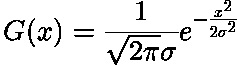

In [ ]:
def Gauss1D(x, s):
  upperex = - ( math.pow(x, 2) / ( 2 * math.pow(s, 2) ) )
  upperside = math.pow( math.e, upperex )
  lowerside = math.sqrt(2 * math.pi) * s
  return (upperside / lowerside)

### 2D Gaussian Kernel

This creates a 2D gaussaian kernel from the 1D Gaussaian function, first by placing it inside a list with the length of _size_ afterwards it computes the gaussaian value with `Gauss1D` on each possible possition. afterwards it converts it into a numpy matrix that then transposed and calculate the dot product from the matrix to get the 2D kernel.

Additional notes that Gaussian operation is a _Circular operation_ this is why we could get a 2D kernel from a 1D kernel via transposation and dot product

In [ ]:
def sizedGaussKernel(size, sigma):
  k = []
  
  halfsize = int(size / 2)

  for i in range( -halfsize, (halfsize + 1) ):
    k.append( Gauss1D(i, sigma) )

  Matrix1DGauss = np.matrix(k)

  return np.dot(
      Matrix1DGauss.T,
      Matrix1DGauss 
      )

### Testing on images

In [ ]:
def showimg(image, title = ""):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)
    plt.show()

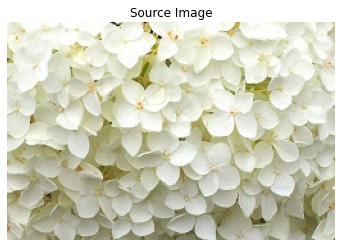

In [ ]:
image_source = cv.imread('FlowerPatch.jpg', cv.IMREAD_COLOR)
image_source = cv.cvtColor(image_source, cv.COLOR_BGR2RGB)
showimg(image_source, "Source Image")

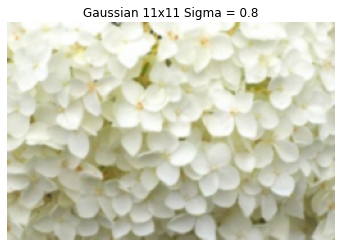

In [ ]:
kernel = sizedGaussKernel(11, 0.8)

blurred_image = cv.filter2D(image_source, -1, kernel)

showimg(blurred_image, "Gaussian 11x11 Sigma = 0.8")